In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas_gbq
import plotly.graph_objs as go
import plotly as ply
import chart_studio.plotly as py

In [2]:
# Create a networkx graph object
G = nx.Graph()

In [3]:
G.add_node('One',posi=(1,1), acc_time = 10, node_count = 5)
G.add_node('Two',posi=(3,1), acc_time = 18, node_count = 3)
G.add_node('Three',posi=(3,3), acc_time = 2, node_count = 2)

In [4]:
G.add_edge('One','Two')
G.add_edge('One','Three')
G.add_edge('Two','Three')

In [5]:
G.edges['One','Two']['count'] = 5
G.edges['One','Three']['count'] = 3
G.edges['Two','Three']['count'] = 1

G.edges['One','Two']['days'] = 15
G.edges['One','Three']['days'] = 3
G.edges['Two','Three']['days'] = 4

G.edges['One','Two']['color'] = 'red'
G.edges['One','Three']['color'] = 'green'
G.edges['Two','Three']['color'] = 'red'

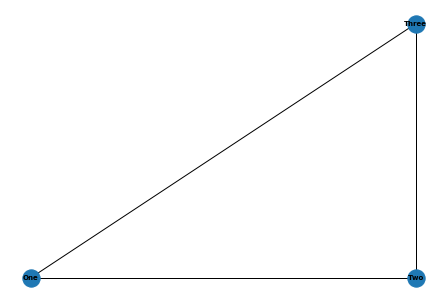

In [6]:
# Draw the resulting graph
pos = nx.get_node_attributes(G,'posi')
nx.draw(G, pos ,with_labels=True, font_weight='bold', font_size = 7)
plt.show()

In [7]:
width = [1,5]
color = ['red', 'green', 'blue']

In [8]:
#Create Edges
def make_edge(x, y, width, color):
    """
    Args:
        x: a tuple of the x from and to, in the form: tuple([x0, x1, None])
        y: a tuple of the y from and to, in the form: tuple([y0, y1, None])
        width: The width of the line

    Returns:
        a Scatter plot which represents a line between the two points given. 
    """
    return  go.Scatter(
                x=x,
                y=y,
                text = hover_txt,
                line=dict(width=width,color=color),
                hoverinfo=None,
                mode='lines')

In [9]:
#Create Edges hpver text
def edge_hover(x, y, hover_txt, color):
    """
    Args:
        x: a tuple of the x from and to, in the form: tuple([x0, x1, None])
        y: a tuple of the y from and to, in the form: tuple([y0, y1, None])
        width: The width of the line

    Returns:
        a Scatter plot which represents a line between the two points given. 
    """
    return  go.Scatter(
                x=x,
                y=y,
                text = hover_txt,
                mode='markers',
                hoverinfo='text',
                hoverlabel = dict(
                            bgcolor = color,
                            font =  dict(color = 'white')
                            ),
                marker=go.Marker(opacity=0.1, symbol = 'triangle-left')
                )

In [10]:
data_edge = []

In [11]:
for edge in G.edges(data=True):
    x0, y0 = G.node[edge[0]]['posi']
    x1, y1 = G.node[edge[1]]['posi']
    
    x=tuple([x0, x1, None])
    y=tuple([y0, y1, None])
    
    xh = tuple([(x0/3*2+x1/3),None])
    yh = tuple([(y0/3*2+y1/3),None])
    
    print(edge)
    
    width = edge[2]['count']
    color = edge[2]['color']
    hover_txt = 'Ave_days:' + str(round(edge[2]['days']/edge[2]['count'],1))
    
    print(width)
    
    data_edge.append(make_edge(x,y,width,color))
    #if else
    data_edge.append(edge_hover(xh,yh,hover_txt,color))
    
    

('Two', 'Three', {'count': 1, 'color': 'red', 'days': 4})
1
('Two', 'One', {'count': 5, 'color': 'red', 'days': 15})
5
('One', 'Three', {'count': 3, 'color': 'green', 'days': 3})
3


/usr/local/lib/python3.5/dist-packages/plotly/graph_objs/_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




In [12]:
data_edge

[Scatter({
     'line': {'color': 'red', 'width': 1}, 'mode': 'lines', 'text': 'Ave_days:4.0', 'x': [3, 3, None], 'y': [1, 3, None]
 }), Scatter({
     'hoverinfo': 'text',
     'hoverlabel': {'bgcolor': 'red', 'font': {'color': 'white'}},
     'marker': {'opacity': 0.1, 'symbol': 'triangle-left'},
     'mode': 'markers',
     'text': 'Ave_days:4.0',
     'x': [3.0, None],
     'y': [1.6666666666666665, None]
 }), Scatter({
     'line': {'color': 'red', 'width': 5}, 'mode': 'lines', 'text': 'Ave_days:3.0', 'x': [3, 1, None], 'y': [1, 1, None]
 }), Scatter({
     'hoverinfo': 'text',
     'hoverlabel': {'bgcolor': 'red', 'font': {'color': 'white'}},
     'marker': {'opacity': 0.1, 'symbol': 'triangle-left'},
     'mode': 'markers',
     'text': 'Ave_days:3.0',
     'x': [2.3333333333333335, None],
     'y': [1.0, None]
 }), Scatter({
     'line': {'color': 'green', 'width': 3}, 'mode': 'lines', 'text': 'Ave_days:1.0', 'x': [1, 3, None], 'y': [1, 3, None]
 }), Scatter({
     'hoverinfo':

In [13]:
    
    
'''
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in J.edges():
    x0, y0 = J.node[edge[0]]['posi']
    x1, y1 = J.node[edge[1]]['posi']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None]) 
'''

"\nedge_trace = go.Scatter(\n    x=[],\n    y=[],\n    line=dict(width=0.5,color='#888'),\n    hoverinfo='none',\n    mode='lines')\n\nfor edge in J.edges():\n    x0, y0 = J.node[edge[0]]['posi']\n    x1, y1 = J.node[edge[1]]['posi']\n    edge_trace['x'] += tuple([x0, x1, None])\n    edge_trace['y'] += tuple([y0, y1, None]) \n"

In [14]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = G.node[node]['posi']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [15]:
for node in G.nodes(data=True):
    #print(node)
    node_trace['marker']['color']+=tuple([node[1]['node_count']])
    node_info = 'Ave_journey: '+str(round(node[1]['acc_time']/node[1]['node_count'],1)) + '<br />Journeys:' +str(node[1]['node_count'])
    node_trace['text']+=tuple([node_info])

In [16]:
'''
for node, adjacencies in enumerate(G.adjacency()):
    print(node, adjacencies)
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = '# of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

'''

"\nfor node, adjacencies in enumerate(G.adjacency()):\n    print(node, adjacencies)\n    node_trace['marker']['color']+=tuple([len(adjacencies[1])])\n    node_info = '# of connections: '+str(len(adjacencies[1]))\n    node_trace['text']+=tuple([node_info])\n\n"

In [17]:
'''
for node in G.nodes():
    node_info = 'Ave_journey: '+str(round(node['acc_time']/node['node_count'],1))

'''

"\nfor node in G.nodes():\n    node_info = 'Ave_journey: '+str(round(node['acc_time']/node['node_count'],1))\n\n"

In [18]:
data_edge.append(node_trace)

In [19]:
data_edge

[Scatter({
     'line': {'color': 'red', 'width': 1}, 'mode': 'lines', 'text': 'Ave_days:4.0', 'x': [3, 3, None], 'y': [1, 3, None]
 }), Scatter({
     'hoverinfo': 'text',
     'hoverlabel': {'bgcolor': 'red', 'font': {'color': 'white'}},
     'marker': {'opacity': 0.1, 'symbol': 'triangle-left'},
     'mode': 'markers',
     'text': 'Ave_days:4.0',
     'x': [3.0, None],
     'y': [1.6666666666666665, None]
 }), Scatter({
     'line': {'color': 'red', 'width': 5}, 'mode': 'lines', 'text': 'Ave_days:3.0', 'x': [3, 1, None], 'y': [1, 1, None]
 }), Scatter({
     'hoverinfo': 'text',
     'hoverlabel': {'bgcolor': 'red', 'font': {'color': 'white'}},
     'marker': {'opacity': 0.1, 'symbol': 'triangle-left'},
     'mode': 'markers',
     'text': 'Ave_days:3.0',
     'x': [2.3333333333333335, None],
     'y': [1.0, None]
 }), Scatter({
     'line': {'color': 'green', 'width': 3}, 'mode': 'lines', 'text': 'Ave_days:1.0', 'x': [1, 3, None], 'y': [1, 3, None]
 }), Scatter({
     'hoverinfo':

In [20]:
fig = go.Figure(data=data_edge,
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

ply.offline.plot(fig, filename='dummy.html')

'dummy.html'